# Exploratory Data Analysis Using OpenPowerlifting Data

# 1. Aims, objectives and background

## 1.1. Introduction

Squat, bench press, and deadlift are the three lifts that make up the strength sport known as powerlifting. It entails the athlete trying a maximal weight single-lift effort with a barbell loaded with weight plates, just like in the Olympic weightlifting competition. Powerlifting originated from a sport known as "odd lifts," which employed a larger variety of events and followed the same three-attempt pattern as powerlifting. These odd lifts were eventually standardized to the present three.

In a competition (or meet), lifts may be executed with or without equipment (the latter of which is usually referred to as "raw" lifting). In this usage, "equipment" refers to a supporting bench shirt, squat/deadlift suit, briefs, or knee wraps. However, a person can still use some accessories and be considered unequipped, and these include weight belts, knee sleeves, wrist wraps, and special footwear. Each federation may or may not have its own set of rules and standards.

Powerlifting competitions are becoming increasingly popular, and take place all around the world. They are a great way to test your strength in an official, standardized manner, while allowing you to have fun and meet others. Most competitions are open to anyone who wishes to participate. Lifters are assessed against others of their gender, weight class, and age. Depending on the organization (federation) they are lifting in, each participant is given three squat, three bench press, and three deadlift attempts. The competition total is determined by the lifter's best legitimate attempt on each lift. Many competitions award the lifter with the greatest total according to their weight class. When two or more lifters reach the same total, the lighter lifter ranks higher.

Being a powerlifter myself, in that I enjoy training for maximal strength on the "big three" of squat, bench, and deadlift, I decided to gain some insights on the participants in these competitions and their performance. I also want to explore the trends in powerlifting and what factors contribute most to higher strength performances.


## 1.2. Aims and objectives

Within this project, I would like to investigate the following:

- Getting to understand the OpenPowerlifting Data service.
- Verify some common knowledge within the strength community about strength levels for each lift and the factors that contribute. For example:
    - Are sex, age, and bodyweight the biggest factors that contribute to a higher total? Does a higher bodyweight reliably imply heavier lifts?
    - Do tested meets and untested meets display a significant difference in performance?
    - How much stronger do participants perform equipped vs unequipped?
    - What are the average lift-to-bodyweight ratios for each of the three lifts? 
- Explore the popularity of Powerlifting competitions.
    - What countries hold the most meets?
    - What does the trend look like in the number of meets and number of participants per year?


## 1.3. Steps of the project
1. Obtain data from the OpenPowerlifting project via a download through requests.
2. Preprocess the data and perform feature engineering for additional data.
3. Explore and analyze.
4. Summarize findings.

## 1.4. Dataset

### Data selection and limitations

For this project I am choosing to analyze the OpenPowerlifting dataset from https://www.openpowerlifting.org/, a volunteer initiative to create an everlasting, public archive of powerlifting data. To aid in achieving this goal, all of their data and code are available for download in simple formats. There is no need to scrape their websites because everything is available simply via a direct download. Work on the OpenPowerlifting project is open source, and the history of data changes is documented and available indefinitely. For those who are interested in contributing, the best place to do so is on their GitLab repository: https://gitlab.com/openpowerlifting/opl-data. Documentation on their dataset can be found here: https://openpowerlifting.gitlab.io/opl-csv/bulk-csv-docs.html.

The dataset is a real-world dataset updated daily, suitable for research and app development (current apps can be found at https://www.plsource.org/). However, the data is limited to whatever each federation posts as official competition results. This does not include details on each person's training programs, for example. This also implies that some data may be missing in the case it was not collected by the federation (As you may see in the intitial dataset analysis below, age class is collected and posted only 75% of the time). In any case, the volume of data included is more than sufficient for producing insights.

# 2. Data Extraction 

In [1]:
#Imports
 
import requests
import pandas as pd
import zipfile, urllib.request, shutil
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Download zip file containing latest powerlifting data

zipurl = 'https://openpowerlifting.gitlab.io/opl-csv/files/openpowerlifting-latest.zip'

r = requests.get(zipurl)
with open('downloaded_file.zip', 'wb') as f:
    f.write(r.content)

In [3]:
# Determine the file name within the zip file, and read it as a dataframe. Since the file contains the date it was uploaded, its name is not static.

z=zipfile.ZipFile('downloaded_file.zip')
filename = ''

# Zipped file contains a .csv and two .txt files. Find the .csv file name.
for file in z.namelist():
  if file.endswith('.csv'):
    filename = file

# Read the CSV within the zipped file.
with z.open(filename) as f:
  # Read the dataset
  df = pd.read_csv(f)


In [39]:
df['AgeClass'].value_counts()

5-12       10233
13-15      70115
16-17     192459
18-19     252261
20-23     332152
24-34     586227
35-39     161586
40-44     148525
45-49     102022
50-54      78005
55-59      48875
60-64      34865
65-69      19752
70-74      12895
75-79       5599
80-999      2447
Name: AgeClass, dtype: int64

In [4]:
pd.set_option('display.max_columns', None)

df.head()

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,Bench4Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Best3DeadliftKg,TotalKg,Place,Dots,Wilks,Glossbrenner,Goodlift,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,Alona Vladi,F,SBD,Raw,33.0,24-34,24-39,O,58.30,60,75.0,80.0,-90.0,NaN,80.0,50.0,55.0,60.0,NaN,60.0,95.0,105.0,107.5,NaN,107.5,247.5,1,279.44,282.18,249.42,57.10,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
1,Galina Solovyanova,F,SBD,Raw,43.0,40-44,40-49,M1,73.10,75,95.0,100.0,105.0,NaN,105.0,62.5,67.5,-72.5,NaN,67.5,100.0,110.0,-120.0,NaN,110.0,282.5,1,278.95,272.99,240.35,56.76,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
2,Daniil Voronin,M,SBD,Raw,15.5,16-17,14-18,T,67.40,75,85.0,90.0,100.0,NaN,100.0,55.0,62.5,-65.0,NaN,62.5,90.0,100.0,105.0,NaN,105.0,267.5,1,206.40,206.49,200.45,41.24,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
3,Aleksey Krasov,M,SBD,Raw,35.0,35-39,24-39,O,66.65,75,125.0,132.0,137.5,NaN,137.5,115.0,122.5,-127.5,NaN,122.5,150.0,165.0,170.0,NaN,170.0,430.0,1,334.49,334.94,325.32,66.68,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
4,Margarita Pleschenkova,M,SBD,Raw,26.5,24-34,24-39,O,72.45,75,80.0,85.0,90.0,NaN,90.0,40.0,50.0,-60.0,NaN,50.0,112.5,120.0,125.0,NaN,125.0,265.0,1,194.46,193.55,187.29,39.34,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament


# 3. Preprocessing & Feature engineering

To be able to make use of the data for analysis, we need to perform a few pre-processing steps. Firstly, I would like set the dtypes in order to reduce memory usage. I will also check for missing values and handle any values that do not make sense.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2854570 entries, 0 to 2854569
Data columns (total 41 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Name              object 
 1   Sex               object 
 2   Event             object 
 3   Equipment         object 
 4   Age               float64
 5   AgeClass          object 
 6   BirthYearClass    object 
 7   Division          object 
 8   BodyweightKg      float64
 9   WeightClassKg     object 
 10  Squat1Kg          float64
 11  Squat2Kg          float64
 12  Squat3Kg          float64
 13  Squat4Kg          float64
 14  Best3SquatKg      float64
 15  Bench1Kg          float64
 16  Bench2Kg          float64
 17  Bench3Kg          float64
 18  Bench4Kg          float64
 19  Best3BenchKg      float64
 20  Deadlift1Kg       float64
 21  Deadlift2Kg       float64
 22  Deadlift3Kg       float64
 23  Deadlift4Kg       float64
 24  Best3DeadliftKg   float64
 25  TotalKg           float64
 26  Place         

In [6]:
# Set efficient dtypes.

def setDTypes(df):
    categoryCols = ['Sex','Event','Equipment','AgeClass','BirthYearClass','Division','Place','Country','State','Federation','ParentFederation','MeetCountry','MeetState','MeetTown','MeetName']
    df[categoryCols] = df[categoryCols].astype('category')
    df['Tested'] = df['Tested'].map({'Yes':True, 'No':False}).fillna(False)
    floatCols = df.select_dtypes(include=[float]).columns
    df[floatCols] = df[floatCols].astype('float32')
    #Order the age classes so they are increasing in age.
    df['AgeClass'] = pd.Categorical(df['AgeClass'], 
                      categories=['5-12','13-15','16-17','18-19','20-23','24-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80-999'],
                      ordered=True)
    df['Date'] = pd.to_datetime(df['Date'])

setDTypes(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2854570 entries, 0 to 2854569
Data columns (total 41 columns):
 #   Column            Dtype         
---  ------            -----         
 0   Name              object        
 1   Sex               category      
 2   Event             category      
 3   Equipment         category      
 4   Age               float32       
 5   AgeClass          category      
 6   BirthYearClass    category      
 7   Division          category      
 8   BodyweightKg      float32       
 9   WeightClassKg     object        
 10  Squat1Kg          float32       
 11  Squat2Kg          float32       
 12  Squat3Kg          float32       
 13  Squat4Kg          float32       
 14  Best3SquatKg      float32       
 15  Bench1Kg          float32       
 16  Bench2Kg          float32       
 17  Bench3Kg          float32       
 18  Bench4Kg          float32       
 19  Best3BenchKg      float32       
 20  Deadlift1Kg       float32       
 21  Deadlift

The dataset memory has been reduced by more than half so far.

According to the documentation, some federations put negative numbers in Best3SquatKg, Best3BenchKg, and Best3DeadliftKg to represent the lowest weight the person failed, if no successful attempt occurred. This will throw off my analysis and I will replace these with 0.

In [7]:
df['Best3SquatKg'] = df['Best3SquatKg'].map(lambda x: 0 if x < 0 else x)
df['Best3BenchKg'] = df['Best3BenchKg'].map(lambda x: 0 if x < 0 else x)
df['Best3DeadliftKg'] = df['Best3DeadliftKg'].map(lambda x: 0 if x < 0 else x)

I need to check for missing values. I will look at the percentage missing for each column.

In [8]:
df.isnull().mean().round(3).sort_values(ascending=False)

Squat4Kg            0.997
Deadlift4Kg         0.993
Bench4Kg            0.993
State               0.806
Squat3Kg            0.740
Squat2Kg            0.732
Squat1Kg            0.729
Deadlift3Kg         0.711
Deadlift2Kg         0.698
Deadlift1Kg         0.693
Bench3Kg            0.587
Bench2Kg            0.573
Bench1Kg            0.568
Country             0.436
Age                 0.368
ParentFederation    0.354
BirthYearClass      0.344
Best3SquatKg        0.337
Best3DeadliftKg     0.282
AgeClass            0.279
MeetState           0.274
Goodlift            0.158
MeetTown            0.124
Best3BenchKg        0.119
Dots                0.077
Wilks               0.077
Glossbrenner        0.077
TotalKg             0.068
BodyweightKg        0.013
WeightClassKg       0.013
Division            0.001
MeetCountry         0.000
Date                0.000
Federation          0.000
Name                0.000
Tested              0.000
Place               0.000
Sex                 0.000
Equipment   

Drop some columns that either have too many null/empty values, or which I won't choose to analyze.


In [9]:
df = df.drop(columns=['State','Country','Age','BirthYearClass','MeetTown','Dots','Glossbrenner','Goodlift','MeetState','Squat4Kg','Bench4Kg','Deadlift4Kg'])

Now I will engineer some new features that would enrich the data. 

If there is a negative number in any of the attempt columns (i.e. Squat1Kg, Deadlift3Kg, etc.) this represents a failed attempt. Create a column to count these per person/row. I will not count the 4th attempt columns (I dropped them in the cell above), as those are special and are not considered toward the TotalKg (refer to documentation).

In [10]:
df['FailedAttempts'] = (df[['Squat1Kg','Squat2Kg','Squat3Kg','Bench1Kg','Bench2Kg','Bench3Kg','Deadlift1Kg','Deadlift2Kg','Deadlift3Kg']] <0).sum(axis=1)

In [11]:
# I won't need each of the attempt columns any longer, drop them.

df = df.drop(columns=['Squat1Kg','Squat2Kg','Squat3Kg','Bench1Kg','Bench2Kg','Bench3Kg','Deadlift1Kg','Deadlift2Kg','Deadlift3Kg'])

Calculate the lift-to-bodyweight ratios for best squat, bench, and deadlift. For any rows where BodyweightKg is zero or null, set to NaN.

In [12]:
df['SquatRatio'] = df['Best3SquatKg'].div(df['BodyweightKg']).replace(np.inf, np.nan)
df['BenchRatio'] = df['Best3BenchKg'].div(df['BodyweightKg']).replace(np.inf, np.nan)
df['DeadliftRatio'] = df['Best3DeadliftKg'].div(df['BodyweightKg']).replace(np.inf, np.nan)

Add a year column.

In [13]:
df['Year'] = pd.DatetimeIndex(df['Date']).year

Create a separate dataset just for the meets themselves. For this dataset, retain the total number of participants and failed attempts.

In [14]:
df_meets = df[['MeetName','MeetCountry','Date','Federation','ParentFederation','FailedAttempts','Year']].copy()
df_meets['Participants'] = df_meets.groupby(['MeetName', 'Date'])['MeetName'].transform('count')
df_meets['FailedAttempts'] = df_meets.groupby(['MeetName', 'Date'])['FailedAttempts'].transform('sum')
df_meets = df_meets.drop_duplicates()

Save our processed data. Since the dataset is large, use parquet.

In [15]:
df.to_parquet('PL_Participants_Processed.parquet')
df_meets.to_parquet('PL_Meets_Processed.parquet')

# 4. Exploratory Analysis

Time to create visualizations and explore for insights. Let's start with variable correlation.

Create a heatmap for calculated correlations between the non-categorical columns.

Text(0.5, 1.0, 'Correlation between Variables in dataset')

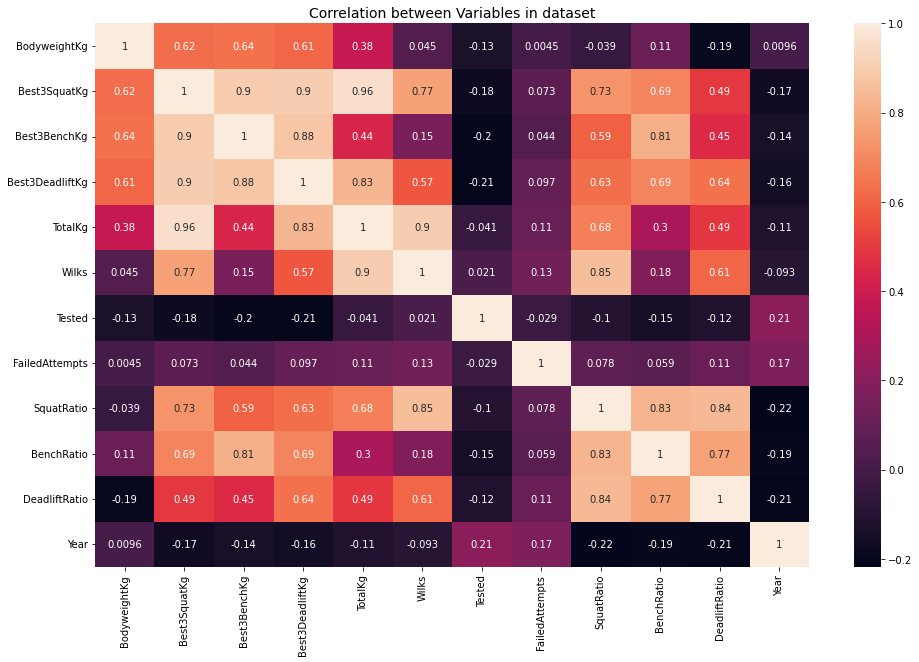

In [16]:
plt.figure(figsize=(16,10))
sns.heatmap(df[np.array(df.columns)].corr(),annot=True, fmt='.2g')
plt.title('Correlation between Variables in dataset', fontsize=14)

There are some variables that are derived from other variables, and so those correlation values do not provide useful insight. For example, the "ratio" and "Wilks" variables are calculated based on bodyweight and lifts, and the "total" variabe is of course the sum of the squat, bench, and deadlfit. Here is what I gather from this heatmap:
1. Bodyweight is significantly correlated with squat, bench, and deadlift weights, and is about equally so among each of them.
2. The strength someone has in one of the three lifts is a significant indicator of the level of strength in the other two.
3. "Tested" and "Year" are the only variables consistently being negatively correlated with the other variables. This means that when a meet is tested, or as the years progress (time become more recent) performance appears to drop. These could be reviewed more closely for verification.


Create scatter plots visualizing relationship between bodyweight and lifts.

<AxesSubplot:xlabel='BodyweightKg', ylabel='Best3DeadliftKg'>

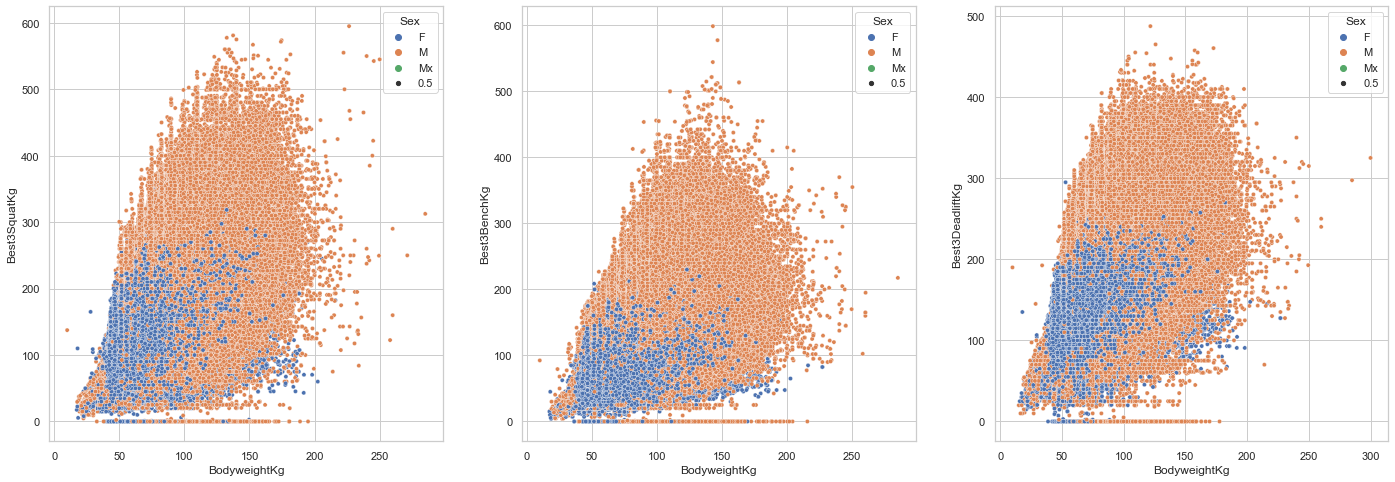

In [17]:
plt.rcParams['figure.figsize'] = (24, 8)
sns.set(style="ticks")
sns.set_style("whitegrid")
fig, ax = plt.subplots(1, 3)

sns.scatterplot(data=df, x='BodyweightKg', y='Best3SquatKg', hue='Sex', ax=ax[0],size=0.5)
sns.scatterplot(data=df, x='BodyweightKg', y='Best3BenchKg', hue='Sex', ax=ax[1],size=0.5)
sns.scatterplot(data=df, x='BodyweightKg', y='Best3DeadliftKg', hue='Sex', ax=ax[2],size=0.5)

The male sex dominates the charts as they are more prevalent in the data. However, for any sex, there appears to be a pattern where the heavier a person is, the higher strength they tend to have. We can also clearly see that there is a more defined bottom threshold for bodyweight when strength increases, than there is an upper threshold. This makes sense because higher bodyweight doesn't always mean you are stronger, but being stronger does usually mean you are heavier.

<AxesSubplot:xlabel='Best3BenchKg', ylabel='Best3DeadliftKg'>

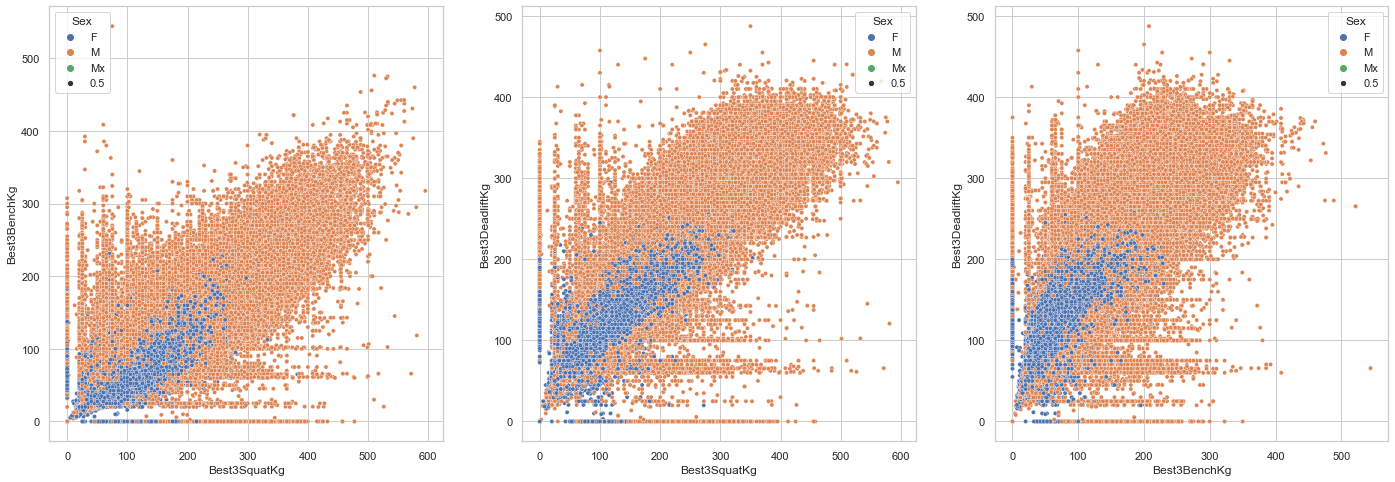

In [18]:
plt.rcParams['figure.figsize'] = (24, 8)
sns.set(style="ticks")
sns.set_style("whitegrid")
fig, ax = plt.subplots(1, 3)

sns.scatterplot(data=df, x='Best3SquatKg', y='Best3BenchKg', hue='Sex', ax=ax[0],size=0.5)
sns.scatterplot(data=df, x='Best3SquatKg', y='Best3DeadliftKg', hue='Sex', ax=ax[1],size=0.5)
sns.scatterplot(data=df, x='Best3BenchKg', y='Best3DeadliftKg', hue='Sex', ax=ax[2],size=0.5)

As seen on the heat map, each of the three lifts are strongly and positively correlated with each other. If someone is stronger on the squat, they are most likely stronger on the bench press and deadlift as well.

Look at some overall statistics.

In [19]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

df.describe()

,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Wilks,FailedAttempts,SquatRatio,BenchRatio,DeadliftRatio,Year
count,2817645.000,1892498.000,2514022.000,2050147.000,2659968.000,2635574.000,2854570.000,1878640.000,2492320.000,2033891.000,2854570.000
mean,84.110,174.693,118.629,189.612,376.257,272.671,0.775,2.108,1.395,2.305,2012.397
std,22.680,67.502,53.154,61.536,205.925,128.976,1.240,0.621,0.476,0.588,10.043
min,10.000,0.000,0.000,0.000,1.000,0.670,0.000,0.000,0.000,0.000,1964.000
25%,67.130,122.500,75.000,140.610,200.000,141.940,0.000,1.682,1.049,1.896,2010.000
50%,81.950,170.000,115.000,190.000,352.500,294.710,0.000,2.080,1.382,2.306,2016.000
75%,98.800,217.720,152.500,235.000,532.500,370.120,1.000,2.500,1.699,2.704,2019.000
max,300.000,595.000,598.740,487.500,1407.500,793.330,9.000,13.750,9.250,19.000,2023.000


Here are my observations:
1. As expected, the order of the lifts people are stronger at are Bench, then Squat, then Deadlift. This can be seen in both the ratio variables, as well as the weight lifted.
2. The record squat, bench, and deadlift are 595kg, 598kg, and 487kg, respectively. It is important to note that these are not necessarily official world records, and were probably done equipped, untested, and according to a standard not adopted by most federations.
3. The median year is 2016. Since this data goes back to the 1960s, that means a large number of records were very recent (hinting at the growing popularity of powerlifting). We will look at this trend later.
4. The standard deviations are very large for the lifts (and total). This implies there are a large variety of participants of all kinds of strength levels performing in these competitions. You do not have to come close to any "standard" to feel like you can participate, as it does not exist.

Let's look at total counts by sex and age.

How many participants are there for each sex and age class? What sex and age group is most involved?

<AxesSubplot:>

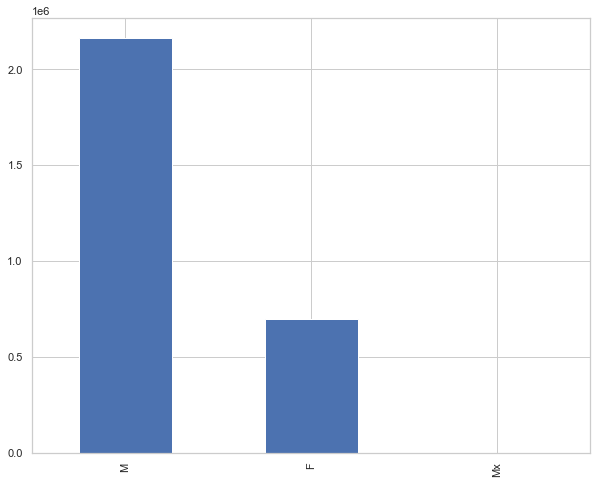

In [20]:
# Sex

plt.rcParams['figure.figsize'] = (10, 8)

df['Sex'].value_counts().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:>

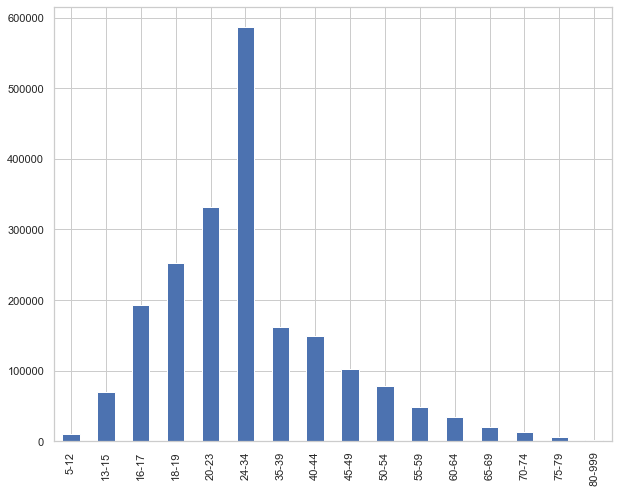

In [21]:
# Age

df['AgeClass'].value_counts().sort_index().plot(kind='bar')

As expected, the most common demographic is the young male (20s). I am curious why the 24-34 age class is not broken up further, as every other class covers only up to 5 years.

Look at some average numbers, broken down by sex, age, tested, and equipment.

In [22]:
# Sex

df.groupby(['Sex']).mean().style.bar(color='purple')

,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Wilks,Tested,FailedAttempts,SquatRatio,BenchRatio,DeadliftRatio,Year
Sex,,,,,,,,,,,,
F,67.604324,113.179693,63.563881,127.290810,251.369827,263.933716,0.807829,0.828459,1.708768,0.962221,1.931324,2015.034442
M,89.418304,197.392227,136.737949,212.437938,416.997955,275.526489,0.714274,0.757907,2.255709,1.537846,2.441654,2011.548589
Mx,83.073677,105.664222,62.862292,128.295532,281.676941,191.671021,0.428571,1.408163,1.279455,0.767892,1.552639,2020.489796


According to the data, the male sex has significantly higher numbers on average across the different lifts. It is also interesting to see that, on average, males participate in more untested events.

In [23]:
# Age

df.groupby(['AgeClass']).mean().style.bar(color='purple')

,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Wilks,Tested,FailedAttempts,SquatRatio,BenchRatio,DeadliftRatio,Year
AgeClass,,,,,,,,,,,,
5-12,50.684162,73.382315,44.471527,85.581651,138.373947,141.815750,0.712987,0.579498,1.343003,0.828884,1.682708,2012.638425
13-15,68.305908,115.076553,68.951099,130.354894,241.274216,204.008636,0.789161,0.651016,1.683124,1.017486,1.924983,2013.308065
16-17,75.436104,143.414540,86.428247,155.456097,327.123322,258.139404,0.862132,0.627515,1.922990,1.156642,2.100592,2013.927273
18-19,80.038040,172.814378,105.734462,181.193552,397.953766,298.927979,0.868624,0.688489,2.176296,1.329406,2.308128,2014.579118
20-23,81.902779,189.350393,124.538214,206.801066,418.561554,303.954742,0.744180,1.189735,2.314720,1.512131,2.544780,2014.130398
24-34,87.176720,200.187260,138.443049,216.408291,408.276184,288.460236,0.656802,1.167070,2.299212,1.574304,2.513303,2014.327699
35-39,91.542854,198.177273,145.064927,212.556198,372.119415,259.511139,0.618649,1.040950,2.195039,1.568649,2.387768,2013.852048
40-44,92.076637,192.524293,142.925639,207.627124,354.597595,246.193253,0.631900,0.981330,2.142562,1.541087,2.330154,2013.229948
45-49,91.207191,182.757473,137.269077,199.804396,331.424835,231.626297,0.648537,0.935739,2.061059,1.494944,2.272743,2013.576464


1. Here we can see that performance is centralized around the younger age classes (20s). 
2. The 40s appear to be the heaviest on average.
3. Children, teenagers, and the elderly have more success on their attempts (probably because they are sticking to what they are confident in and not overly exerting themselves).

In [24]:
# Tested

df.groupby(['Tested']).mean().style.bar(color='purple')

,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Wilks,FailedAttempts,SquatRatio,BenchRatio,DeadliftRatio,Year
Tested,,,,,,,,,,,
False,88.986336,197.251291,137.177457,211.787177,390.261688,268.189117,0.835874,2.228174,1.520501,2.426572,2008.908476
True,82.385109,168.163487,112.381054,182.351466,371.180359,274.275665,0.753392,2.073844,1.353638,2.265327,2013.641422


When a meet is not tested for performance-enhancing substances, performance does appear to be higher.

In [25]:
# Equipment

df.groupby(['Equipment']).mean().style.bar(color='purple')

,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Wilks,Tested,FailedAttempts,SquatRatio,BenchRatio,DeadliftRatio,Year
Equipment,,,,,,,,,,,,
Multi-ply,94.840668,258.283346,176.505583,232.793434,400.041046,263.022064,0.271117,0.985990,2.741062,1.854454,2.509156,2008.965890
Raw,84.010185,162.121953,114.844509,190.736793,320.716766,233.963104,0.708986,1.052725,1.956180,1.353154,2.308686,2016.493509
Single-ply,82.384918,175.637541,115.739200,182.843951,407.948853,299.421753,0.864949,0.427163,2.171664,1.394438,2.280392,2008.357616
Straps,98.586662,265.000000,150.000000,317.695320,326.525085,206.754333,0.000000,0.833333,2.455978,1.390176,3.271912,2018.625000
Unlimited,97.380112,275.422774,233.032123,231.657564,277.331787,178.926376,0.330262,1.156899,2.849565,2.382700,2.392283,2019.618995
Wraps,89.355301,190.626610,121.896328,208.863174,515.115234,356.737946,0.332279,1.292872,2.124249,1.348052,2.357918,2016.464514


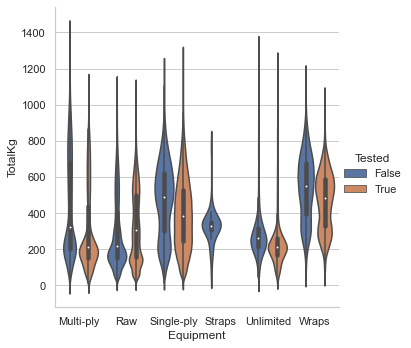

In [26]:
sns.catplot(data=df, x='Equipment', y='TotalKg', kind='violin', hue='Tested')
plt.show()

Looking at the mean total for each equipment type, it is surprising to me that wearing multi-ply suits (unlimited includes this) do not increase performance compared to raw lifting, but single-ply does. However, when it comes to the bench press, we can see how the multi-ply and unlimited types are effective. Perhaps there are diminishing effects on the deadlift and squat when movement is overly restricted. 

Of course, straps and wraps help you perform better than raw, and so they should be encouraged whenever they are allowed during an unequipped competition. Regarding straps, I think the range in the total is narrower due to the fact that straps are only used on deadlifts, and would not be used on bench or squat.

Look at a distribution of number of failed attempts. How common is it that no lifts are failed? We already saw that the average is about 0.78 per person.

<AxesSubplot:xlabel='FailedAttempts', ylabel='Count'>

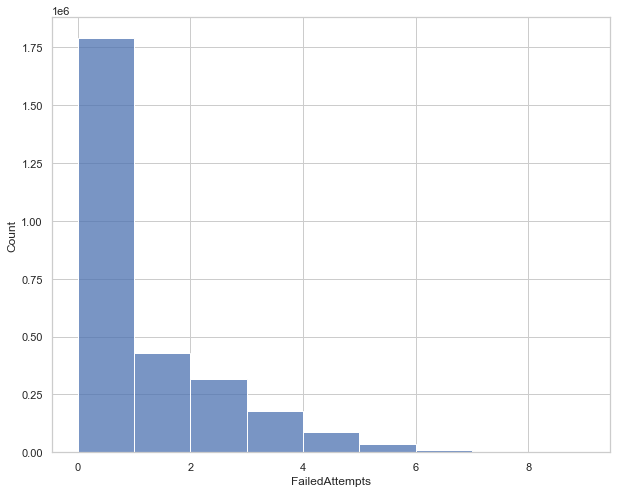

In [27]:
sns.histplot(data=df,x='FailedAttempts',binwidth=1)

In a powerlifting competition, most people consider it a success to get a "9/9" which means all 9 attempts were "good" and none failed. From the plot above, this seems to be quite common.

What are the top 5 most popular parent federations? (by total number of participants).

<AxesSubplot:xlabel='ParentFederation'>

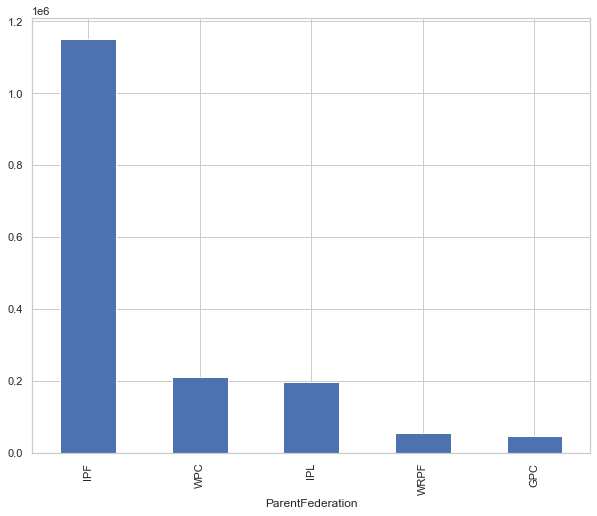

In [28]:
df.groupby('ParentFederation').count()['Name'].sort_values(ascending=False).head(5).plot(kind='bar')

The International Powerlifting Federation (IPF) is the primary parent federation that most official meets fall under.

What are the average number of participants per meet? Let's look at the average failed attempts as well.

In [29]:
df_meets[['Participants','FailedAttempts']].mean()

Participants     69.651
FailedAttempts   50.124
dtype: float64

What are the top 10 countries with the most meets?

<AxesSubplot:xlabel='MeetCountry'>

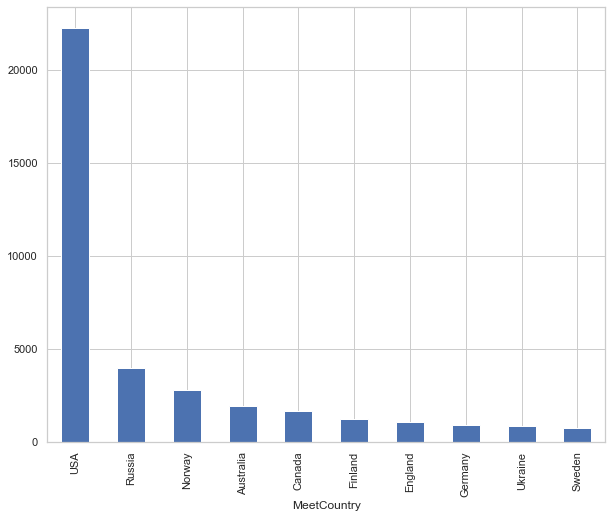

In [30]:
df_meets.groupby('MeetCountry').count().sort_values(by='MeetName',ascending=False).head(10)['MeetName'].plot(kind='bar')

Either Powerlifting is gaining rapid popularity in the USA and not elsewhere, or the data is biased toward collection of USA data. My assumption would be the latter, since it may be difficult to obtain the data from meets in other countries (or they might be private or withhold from posting official results on the internet). 

Russia and Norway being up next makes sense to me, as they have both produced some famous powerlifters as well as well-known training programs that hav since been adopted and modified by powerlifting communities across the world (i.e. Smolov Squats, Norwegian Method). 
Smolov Squats - https://legionathletics.com/smolov-squat-program/
Norwegian Method - https://www.strongerbyscience.com/high-frequency-training-for-a-bigger-total-research-on-highly-trained-norwegian-powerlifters/


How has the number of meets and participants per year grown over time? I will cut off the trend line to the end of the previous year (at time of analysis).

<AxesSubplot:>

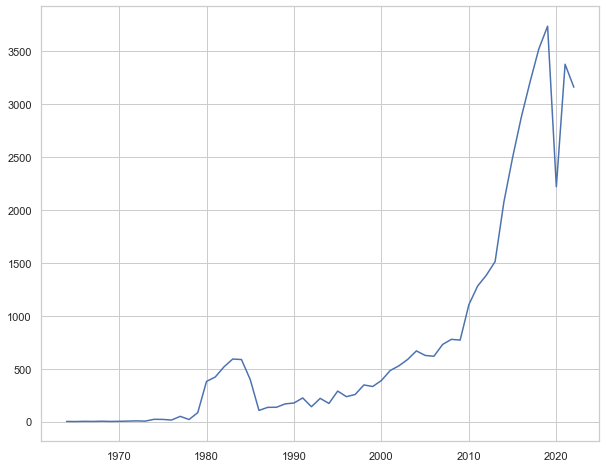

In [31]:
# Meets per year

df_meets['Year'].loc[(df_meets['Year'] != 2023)].value_counts().sort_index(ascending=True).plot(kind='line')

We can clearly see that Powerlifting competitions have been gaining popularity since the new millenium! It saw its largest growth in popularity in the 2010s. However, in 2020 we saw a temporary decrease in the number of meets held due to the Covid-19 pandemic restrictions.

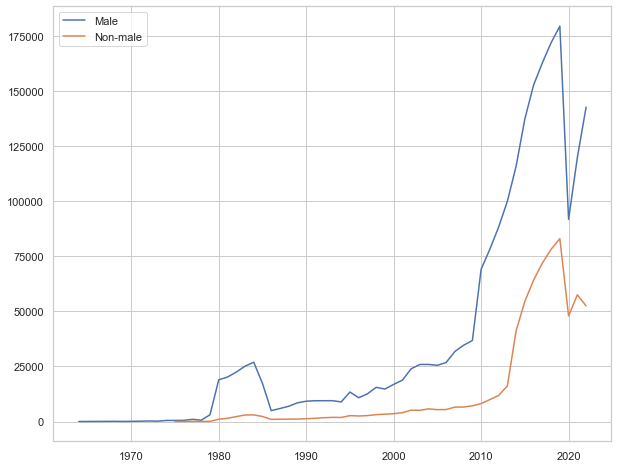

In [32]:
# Participants per year, by sex

df['Year'].loc[(df['Year'] != 2023) & (df['Sex'] == 'M')].value_counts().sort_index(ascending=True).plot(kind='line')
df['Year'].loc[(df['Year'] != 2023) & (df['Sex'] != 'M')].value_counts().sort_index(ascending=True).plot(kind='line')
plt.legend(['Male','Non-male'])

This looks similar to the meets trend. In 2019 there was a peek of over a quarter of a million people participating in meets. We also see that non-male participants have been growing just as much as males.

# 5. Conclusion and further research ideas

In this project, I have explored data on powerlifting meet results going back to the 1960s. I have verified some of my initial assumptions about the powerlifiting community and now summarize my major take-aways (according to the data) as follows:

- Lift performance (i.e. amount of weight lifted) is positively correlated with bodyweight, sex, age, performance in other lifts, and use of equipment.

- There is a historic prominence of young male athletes in powerlifting competitions. However, meets within the last decade have increasingly had more non-male participants.

- Powerlifting popularity has severely escalated in the 2010s, and may continue to grow further. Each meet averages around 69 participants.

- In untested meets, participants usually perform better (i.e. lift heavier weights) and this can most likely be credited to performance-enhancing substances. Therefore, when considering the health risks of said substances, it remains justified that most powerlifting meets (or any competitive athletic sport) be tested in order to provide a just and fair opportunity to participants.

- Powerlifting meets are most prominent in the USA.


**Project nuances:**

- This was meant to be a brief, not an in-depth, study of powerlifting data. I did not perform any extensive data mining useful for making predictions.

- The dataset goes back to the 1960s, and a lot of the statistical analysis done in this project may not be reflective of the meets and participants as of current or recent years. Statistical descriptors of a more recent year may provide more relevance, as well as moving averages.

- There are other factors that were not implemented into the analysis, such as the incorporation of other external data sources.

**Ideas for future research:**

To build upon this study, one can:

- Expand the dataset to include additional information regarding the participants, meets, and federations where possible.

- Explore how strength performance, strength ratios, or the participation of different demographics, have changed over time.

- Analyze the measures that I didn't look at in this study, such as Wilks, Glossbrenner, Division, Place, Dots points, and Goodlift points.

- Analyze which lift attempts (first, second, or third) tend to be most successful and which is considered the "best" lift on average. Review how much weight goes up on each attempt, and how often the same weight is repeated.

- Investigate the various projects and apps that use this same dataset.